<a href="https://colab.research.google.com/github/brownethan/numpyMini/blob/main/numpyDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import sys
import datetime
import math
import matplotlib.pyplot as plt

In [20]:
def inside_circle(total_count):
  x = np.random.uniform(size=total_count)
  y = np.random.uniform(size=total_count)
  radii = np.sqrt(x*x+y*y)
  count = len(radii[np.where(radii<=1.0)])
  return count

In [21]:
# Changed n_samples to be in range of 100 to 100,000,000 and output it into the print statement
def main():
    for n_samples in [10**exp for exp in range(2,9)]:
      start_time = datetime.datetime.now()
      counts = inside_circle(n_samples)
      my_pi = 4.0 * counts / n_samples
      end_time = datetime.datetime.now()
      elapsed_time = (end_time - start_time).total_seconds()
      size_of_float = np.dtype(np.float64).itemsize
      memory_required = 3 * n_samples * size_of_float / (1024**3)
      print("Pi: {}, memory: {} GiB, time: {} s, Number of samples: {}".format(my_pi, memory_required,
                                                      elapsed_time, n_samples))

if __name__ == '__main__':
    main()

Pi: 3.44, memory: 2.2351741790771484e-06 GiB, time: 0.000192 s, Number of samples: 100
Pi: 3.196, memory: 2.2351741790771484e-05 GiB, time: 0.00012 s, Number of samples: 1000
Pi: 3.1528, memory: 0.00022351741790771484 GiB, time: 0.0005 s, Number of samples: 10000
Pi: 3.1384, memory: 0.0022351741790771484 GiB, time: 0.004923 s, Number of samples: 100000
Pi: 3.140732, memory: 0.022351741790771484 GiB, time: 0.088388 s, Number of samples: 1000000
Pi: 3.1415352, memory: 0.22351741790771484 GiB, time: 0.86209 s, Number of samples: 10000000
Pi: 3.14204552, memory: 2.2351741790771484 GiB, time: 5.099668 s, Number of samples: 100000000


In [22]:
# Outputing relative error along with other statements and outputting to a csv
def main():
  numpyPi = np.array( [] )
  for n_samples in [10**exp for exp in range(2,9)]:
    start_time = datetime.datetime.now()
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    end_time = datetime.datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
    size_of_float = np.dtype(np.float64).itemsize
    memory_required = 3 * n_samples * size_of_float / (1024**3)
    rel_error = abs(math.pi - my_pi)/math.pi

    rowCSV = np.append(numpyPi, [my_pi, memory_required, elapsed_time, n_samples, rel_error])
    numpyPi = np.append(numpyPi, rowCSV)

    print("Pi: {}, memory: {} GiB, time: {} s, Number of samples: {}, Relative Error: {}".format(my_pi, memory_required,
                                                      elapsed_time, n_samples, rel_error))
    numpyPi = numpyPi.reshape(-1, 5)

    np.savetxt("piSim.csv", numpyPi, delimiter = ',')
if __name__ == '__main__':
    main()

Pi: 3.28, memory: 2.2351741790771484e-06 GiB, time: 0.000204 s, Number of samples: 100, Relative Error: 0.04405642668283338
Pi: 3.192, memory: 2.2351741790771484e-05 GiB, time: 0.00012 s, Number of samples: 1000, Relative Error: 0.016045156698659916
Pi: 3.136, memory: 0.00022351741790771484 GiB, time: 0.000504 s, Number of samples: 10000, Relative Error: 0.0017801969276323767
Pi: 3.1442, memory: 0.0022351741790771484 GiB, time: 0.003359 s, Number of samples: 100000, Relative Error: 0.0008299441390747022
Pi: 3.13874, memory: 0.022351741790771484 GiB, time: 0.0405 s, Number of samples: 1000000, Relative Error: 0.0009080278394888721
Pi: 3.1412456, memory: 0.22351741790771484 GiB, time: 0.446776 s, Number of samples: 10000000, Relative Error: 0.00011047058866673191
Pi: 3.14166708, memory: 2.2351741790771484 GiB, time: 4.705351 s, Number of samples: 100000000, Relative Error: 2.3690662162003944e-05


In [23]:
numpyPi= np.loadtxt(fname = "piSim.csv", delimiter=',')
print(numpyPi)

[[3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.19200000e+00 2.23517418e-05 1.20000000e-04 1.00000000e+03
  1.60451567e-02]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.19200000e+00 2.23517418e-05 1.20000000e-04 1.00000000e+03
  1.60451567e-02]
 [3.13600000e+00 2.23517418e-04 5.04000000e-04 1.00000000e+04
  1.78019693e-03]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.19200000e+00 2.23517418e-05 1.20000000e-04 1.00000000e+03
  1.60451567e-02]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.28000000e+00 2.23517418e-06 2.04000000e-04 1.00000000e+02
  4.40564267e-02]
 [3.19200000e+00 2.23517418e-05 1.200000

Text(0, 0.5, 'Relative Error')

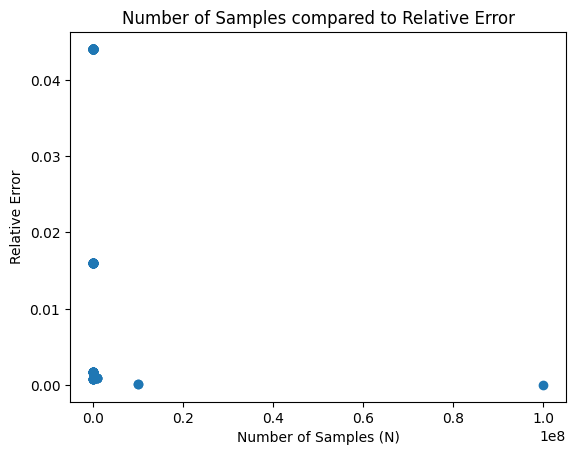

In [37]:
fig, ax = plt.subplots() #plot declaration

ax.scatter(x=numpyPi[:, 3], y=numpyPi[:,4]) #the graph

ax.set_title("Number of Samples compared to Relative Error") #title
ax.set_xlabel("Number of Samples (N)") #horizontal axis label
ax.set_ylabel("Relative Error") #vertical axis label

Text(0, 0.5, 'Memory Used (GiB)')

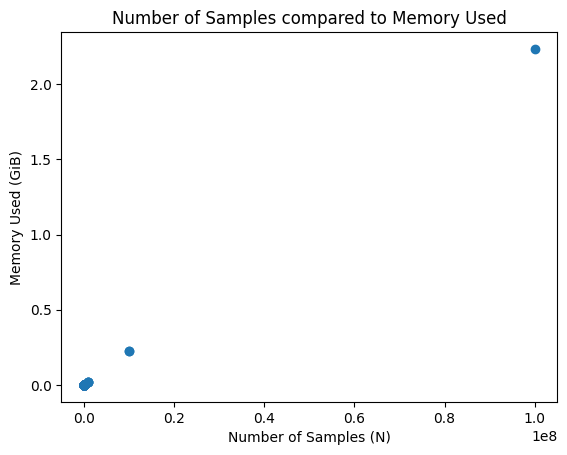

In [38]:
fig, ax = plt.subplots() #plot declaration

ax.scatter(x=numpyPi[:, 3], y=numpyPi[:,1]) #the graph

ax.set_title("Number of Samples compared to Memory Used") #title
ax.set_xlabel("Number of Samples (N)") #horizontal axis label
ax.set_ylabel("Memory Used (GiB)") #vertical axis label

Text(0, 0.5, 'Time Elapsed (sec)')

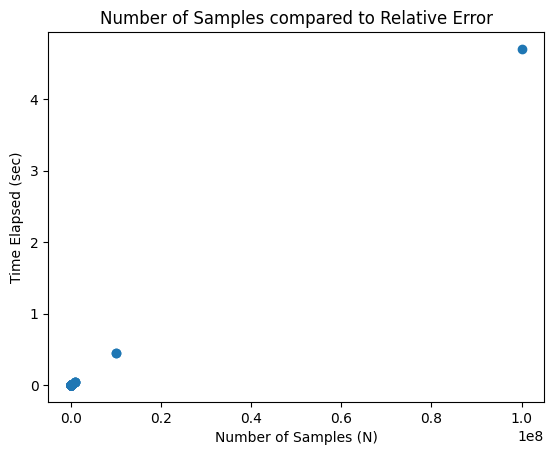

In [39]:
fig, ax = plt.subplots() #plot declaration

ax.scatter(x=numpyPi[:, 3], y=numpyPi[:,2]) #the graph

ax.set_title("Number of Samples compared to Time Elapsed") #title
ax.set_xlabel("Number of Samples (N)") #horizontal axis label
ax.set_ylabel("Time Elapsed (sec)") #vertical axis label